In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cartopy
import pickle

# Eulerian Storm Tracker

In [98]:
file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_QBOi.EXP1.AMIP.v2.001_1977_1981/eulerian_storm_track/plot_data.pkl'
WK_DIR = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_QBOi.EXP1.AMIP.v2.001_1977_1981/eulerian_storm_track'
data = pickle.load(open(file, 'rb'))
print(data.keys())

dict_keys(['era5', 'erai', 'model', 'model_zonal', 'era5_zonal', 'erai_zonal'])


In [99]:
erai = data['erai']
model = data['model']

e_zonal = data['erai_zonal']
m_zonal = data['model_zonal']

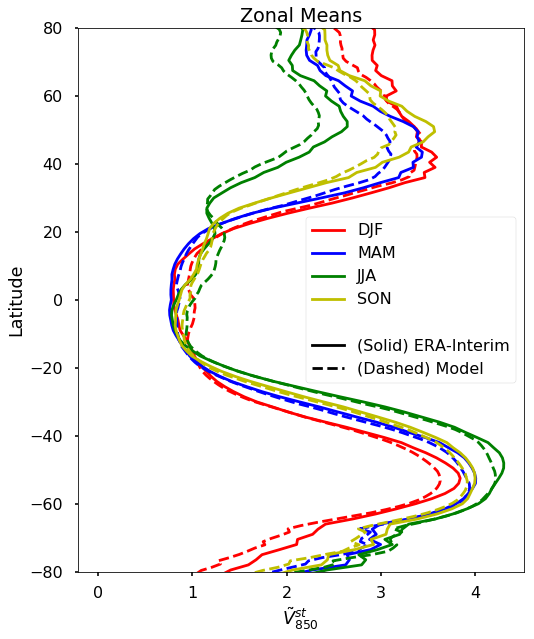

In [117]:
# zonal figure
plt.style.use('seaborn-poster')
plt.figure(figsize=(8, 10))
plt.plot(e_zonal['djf'], e_zonal['lat'], 'r', label='DJF')
plt.plot(m_zonal['djf'], m_zonal['lat'], 'r--')
plt.plot(e_zonal['mam'], e_zonal['lat'], 'b', label='MAM')
plt.plot(m_zonal['mam'], m_zonal['lat'], 'b--')
plt.plot(e_zonal['jja'], e_zonal['lat'], 'g', label='JJA')
plt.plot(m_zonal['jja'], m_zonal['lat'], 'g--')
plt.plot(e_zonal['son'], e_zonal['lat'], 'y', label='SON')
plt.plot(m_zonal['son'], m_zonal['lat'], 'y--')

plt.plot([0, 0], [0, 0], 'w', label=' ')
plt.plot([0, 0], [0, 0], 'k-', label='(Solid) ERA-Interim')
plt.plot([0, 0], [0, 0], 'k--', label='(Dashed) Model')
plt.title(r'Zonal Means')
plt.xlabel(r'$\tilde{V}^{st}_{850}$')
plt.ylabel(r'Latitude')
plt.ylim(-80, 80)
plt.legend(loc=0)
plt.savefig(os.path.join(WK_DIR, 'zonal_means.png'), dpi=300.)
plt.show()

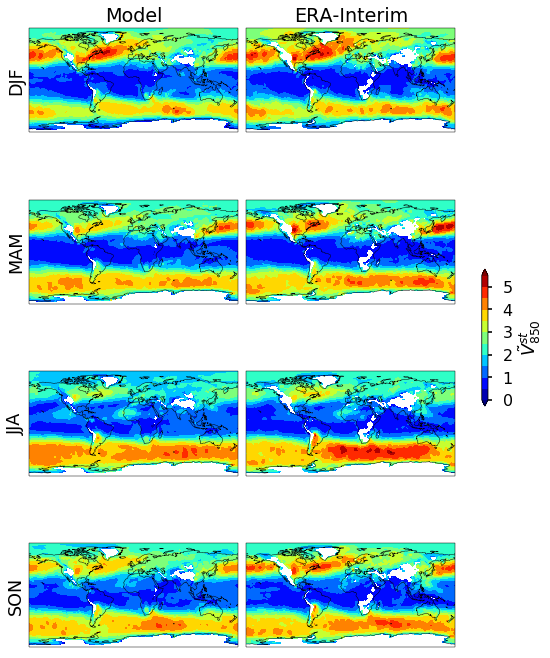

In [116]:
levels = np.arange(0, 6, .5)
plt.style.use('seaborn-poster')

plt.figure(figsize=(8,10))

season='djf'
ax1_1 = ax = plt.subplot(4,2,1, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(model['lon'], model['lat'], model[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_yticks([]); ax.set_ylabel(season.upper())
ax.set_title('Model')

ax1_2 = ax = plt.subplot(4,2,2, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(erai['lon'], erai['lat'], erai[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_title('ERA-Interim')

season='mam'
ax2_1 = ax = plt.subplot(4,2,3, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(model['lon'], model['lat'], model[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_yticks([]); ax.set_ylabel(season.upper())

ax2_2 = ax = plt.subplot(4,2,4, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(erai['lon'], erai['lat'], erai[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()

season='jja'
ax3_1 = ax = plt.subplot(4,2,5, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(model['lon'], model['lat'], model[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_yticks([]); ax.set_ylabel(season.upper())

ax3_2 = ax = plt.subplot(4,2,6, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(erai['lon'], erai['lat'], erai[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()

season='son'
ax4_1 = ax = plt.subplot(4,2,7, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(model['lon'], model['lat'], model[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_yticks([]); ax.set_ylabel(season.upper())

ax4_2 = ax = plt.subplot(4,2,8, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(erai['lon'], erai['lat'], erai[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()

plt.tight_layout()
cax = plt.colorbar(pc, ax=[ax1_1, ax1_2, ax2_1, ax2_2, ax3_1, ax3_2, ax4_1, ax4_2], shrink=.2)
cax.set_label(r'$\tilde{V}^{st}_{850}$')

plt.savefig(os.path.join(WK_DIR, 'eulerian_storm_track.png'), dpi=300.)
plt.show()